In [1]:
# importações
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# dataset
digits=datasets.load_digits()

In [2]:
print(digits.DESCR)
# 5620 instâncias
# 64 atributos
# imagens de matriz 8x8 indo de 0 a 16

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
# visualizando os pixels
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [4]:
# visualizando as classes
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

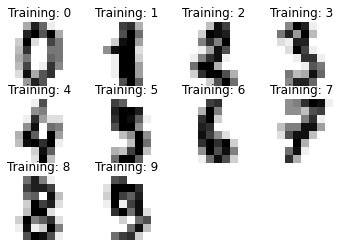

In [5]:
# visualizando imagens e classes
images_and_labels=list(zip(digits.images,digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Training: %i'%label)

### Machine Learning

In [6]:
# convertendo o dataset em dataframe
n_samples=len(digits.images)
data=digits.images.reshape((n_samples,-1)) # tamanho do dataser por 1 dimensão
classe=digits.target
dataset=pd.DataFrame(data)
dataset['classe']=classe
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
# dividindo os dados
X_train,X_test,y_train,y_test=train_test_split(dataset.drop('classe',axis=1),dataset['classe'],test_size=0.3)

In [8]:
# verificando a forma dos dados
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [9]:
y_train.shape,y_test.shape

((1257,), (540,))

In [10]:
# instanciando o algoritmo KNN
knn=KNeighborsClassifier(n_neighbors=3)

In [11]:
# treinando o algoritmo
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# predizendo novos pontos
resultado=knn.predict(X_test)

### Validação

In [13]:
# validando
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.97      1.00      0.98        63
           2       1.00      1.00      1.00        49
           3       1.00      0.97      0.98        65
           4       1.00      0.98      0.99        53
           5       0.96      0.96      0.96        55
           6       0.98      0.98      0.98        51
           7       0.97      1.00      0.98        61
           8       1.00      0.98      0.99        49
           9       0.97      0.97      0.97        38

    accuracy                           0.99       540
   macro avg       0.99      0.98      0.99       540
weighted avg       0.99      0.99      0.99       540



In [14]:
# matriz de confusão
print(pd.crosstab(y_test,resultado,rownames=['Real'],colnames=['           Predito'], margins=True))

           Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                           
0                   56   0   0   0   0   0   0   0   0   0   56
1                    0  63   0   0   0   0   0   0   0   0   63
2                    0   0  49   0   0   0   0   0   0   0   49
3                    0   0   0  63   0   1   0   1   0   0   65
4                    0   0   0   0  52   0   0   1   0   0   53
5                    0   0   0   0   0  53   1   0   0   1   55
6                    0   1   0   0   0   0  50   0   0   0   51
7                    0   0   0   0   0   0   0  61   0   0   61
8                    0   1   0   0   0   0   0   0  48   0   49
9                    0   0   0   0   0   1   0   0   0  37   38
All                 56  65  49  63  52  55  51  63  48  38  540


In [15]:
# cross validation
# garante que não haja tanta variância tanto para bons como maus resultados
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,dataset.drop('classe',axis=1),dataset['classe'],cv=5) # com 5 folds para iterar
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98328691, 0.96657382])

In [16]:
# otimizando o parâmetro K com o GridSearch
from sklearn.model_selection import GridSearchCV

In [17]:
# valores do parâmetro k ou n_neighbors
k_list=list(range(1,31))
# criando dicionário com k como chave e a lista como valores
k_values=dict(n_neighbors=k_list)
print(k_values)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [18]:
# instanciando o GridSearch
grid=GridSearchCV(knn,k_values, cv=5,scoring='accuracy')
# objeto classificador, dicionário com o parâmetro a ser testado, número de folds e scoring para avaliar a perfomance do algoritmo

In [19]:
# treinando o objeto
grid.fit(dataset.drop('classe',axis=1),dataset['classe'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [20]:
# visualizando os valores de scores
grid.cv_results_

{'mean_fit_time': array([0.01684103, 0.01237326, 0.01101851, 0.01169691, 0.0111393 ,
        0.01095881, 0.01155162, 0.01127319, 0.01196346, 0.01141419,
        0.01148515, 0.01191726, 0.01110778, 0.01084905, 0.01098261,
        0.01101756, 0.01102819, 0.01079073, 0.01094236, 0.0115314 ,
        0.01153083, 0.01260853, 0.01092534, 0.01108341, 0.01081362,
        0.01107035, 0.01081514, 0.01080527, 0.01083317, 0.01094975]),
 'std_fit_time': array([9.68982198e-03, 7.69683910e-04, 2.42837393e-04, 7.06924035e-04,
        2.09087771e-04, 2.21896549e-04, 2.10707213e-04, 5.97081723e-04,
        5.89915031e-04, 2.34728224e-04, 1.09096455e-03, 9.60011960e-04,
        5.43240373e-04, 1.44589371e-04, 2.90967136e-04, 3.75882448e-04,
        3.31093988e-04, 4.88486098e-05, 1.39475366e-04, 4.35656142e-04,
        5.04226073e-04, 9.95468531e-04, 8.60729243e-05, 5.06203675e-04,
        5.80958324e-05, 3.76389791e-04, 3.45372992e-05, 4.76869582e-05,
        1.29447070e-04, 3.17311415e-04]),
 'mean_scor

In [21]:
# melhor parâmetro
grid.best_params_

{'n_neighbors': 2}

In [22]:
# melhor score - accuracy
grid.best_score_

0.9671711544413494